In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import ttest_rel
from scipy.stats import ttest_1samp
from scipy.stats import linregress
import statsmodels.api as sm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [20]:

housing=pd.read_csv('train.csv')
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [21]:
housing.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [23]:
housing.dtypes.head()

Id               int64
MSSubClass       int64
MSZoning        object
LotFrontage    float64
LotArea          int64
dtype: object

In [5]:
set(housing.dtypes)

{dtype('int64'), dtype('float64'), dtype('O')}

In [6]:
housing.shape

(1460, 81)

In [7]:
pd.isnull(housing).sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
dtype: int64

In [8]:
housing=housing.dropna(1)

/var/folders/8p/70rg96_90177mq050h9mr8d80000gn/T/ipykernel_21124/2053911174.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  housing=housing.dropna(1)


In [9]:
pd.isnull(housing).sum().sort_values(ascending=False).head(3)

Id            0
Fireplaces    0
1stFlrSF      0
dtype: int64

In [10]:
housing=housing.sort_values(by=['SalePrice'], ascending=True)
housing

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
495,496,30,C (all),7879,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,115,0,0,0,0,11,2009,WD,Abnorml,34900
916,917,20,C (all),9000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2006,WD,Abnorml,35311
968,969,50,RM,5925,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,5,2009,WD,Abnorml,37900
533,534,20,RL,5000,Pave,Reg,Low,AllPub,Inside,Mod,...,0,0,0,0,0,1,2007,WD,Normal,39300
30,31,70,C (all),8500,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,172,0,0,0,0,7,2008,WD,Normal,40000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,804,60,RL,13891,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,192,0,0,1,2009,New,Partial,582933
898,899,20,RL,12919,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2010,New,Partial,611657
1169,1170,60,RL,35760,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,0,7,2006,WD,Normal,625000
1182,1183,60,RL,15623,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,555,0,7,2007,WD,Abnorml,745000


In [11]:
housing.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,477.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,808.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [12]:
housing.select_dtypes('object').head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,ExterCond,Foundation,Heating,HeatingQC,CentralAir,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition
495,C (all),Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,...,TA,CBlock,GasA,TA,N,TA,Typ,N,WD,Abnorml
916,C (all),Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,...,TA,CBlock,GasA,TA,N,TA,Typ,Y,WD,Abnorml
968,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,...,TA,BrkTil,Grav,Fa,N,TA,Typ,Y,WD,Abnorml
533,RL,Pave,Reg,Low,AllPub,Inside,Mod,BrkSide,Norm,Norm,...,Fa,Slab,GasA,Fa,N,Fa,Typ,N,WD,Normal
30,C (all),Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,...,Fa,BrkTil,GasA,TA,N,TA,Typ,N,WD,Normal


In [13]:
housing.select_dtypes(['int64']).head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
495,496,30,7879,4,5,1920,1950,495,0,225,...,0,523,115,0,0,0,0,11,2009,34900
916,917,20,9000,2,3,1949,1950,50,0,430,...,0,0,0,0,0,0,0,10,2006,35311
968,969,50,5925,3,6,1910,1950,0,0,600,...,0,0,0,0,0,0,0,5,2009,37900
533,534,20,5000,1,3,1946,1950,0,0,0,...,0,0,0,0,0,0,0,1,2007,39300
30,31,70,8500,4,4,1920,1950,0,0,649,...,0,54,172,0,0,0,0,7,2008,40000


In [14]:
variables =pd.DataFrame(housing.corr()['SalePrice'].sort_values(ascending=False))
variables=variables[(variables['SalePrice']>0.5) | (variables['SalePrice']<-0.5)]
variables

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


<AxesSubplot:>

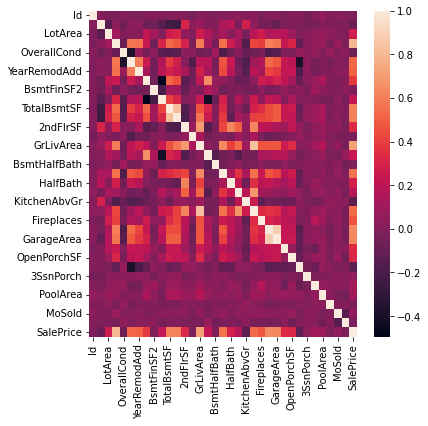

In [15]:
plt.figure(figsize=(6,6))
sns.heatmap(housing.corr())

In [16]:
variables.index

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object')

In [24]:
x = sm.add_constant(housing[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd']]) 

y = housing['SalePrice']

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     495.4
Date:                Tue, 27 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:36:46   Log-Likelihood:                -17459.
No. Observations:                1460   AIC:                         3.494e+04
Df Residuals:                    1449   BIC:                         3.500e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.186e+06   1.29e+05     -9.187      0.000   -1.44e+06   -9.33e+05
OverallQual    1.96e+04   1190.159     16.472      0.000    1.73e+04    2.19e+04
GrLivArea       51.2971      4.233     12.119      0.000      42.994      59.600
GarageCars    1.042e+04   3044.272      3.422      0.001    4446.249    1.64e+04
GarageArea      14.9475     10.311      1.450      0.147      -5.279      35.174
TotalBsmtSF     19.8651      4.295      4.625      0.000      11.439      28.291
1stFlrSF        14.1737      4.930      2.875      0.004       4.504      23.844
FullBath     -6790.8715   2682.369     -2.532      0.011   -1.21e+04   -1529.130
TotRmsAbvGrd    33.1051   1119.061      0.030      0.976   -2162.048    2228.258
YearBuilt      268.2407     50.346      5.328      0.000     169.481     367.000
YearRemodAdd   296.4812     63.635      4.659      0.000     171.655     421.307
==============================================================================
Omnibus:                      477.814   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            58906.279
Skew:                          -0.412   Prob(JB):                         0.00
Kurtosis:                      34.107   Cond. No.                     4.69e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.69e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

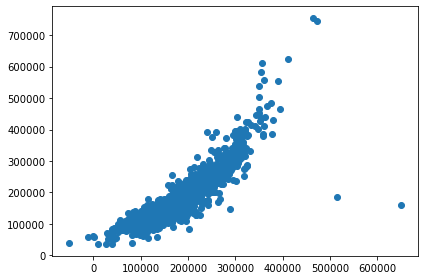

In [25]:
plt.scatter(predictions, y)
plt.tight_layout()

In [26]:
scaler = StandardScaler()

In [28]:
standar = scaler.fit_transform(housing[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd']])

In [29]:
standar

array([[ 0.65147924,  0.37033344,  0.31172464, ...,  0.91220977,
         1.05099379,  0.87866809],
       [-0.07183611, -0.48251191,  0.31172464, ..., -0.31868327,
         0.15673371, -0.42957697],
       [ 0.65147924,  0.51501256,  0.31172464, ..., -0.31868327,
         0.9847523 ,  0.83021457],
       ...,
       [ 0.65147924,  1.56964722, -1.02685765, ...,  1.52765629,
        -1.00249232,  1.02402865],
       [-0.79515147, -0.83278768, -1.02685765, ..., -0.93412978,
        -0.70440562,  0.53949344],
       [-0.79515147, -0.49393395, -1.02685765, ..., -0.31868327,
        -0.20759447, -0.96256569]])

In [30]:
pc = PCA(n_components=2)

In [31]:
principalComponents = pc.fit_transform(standar)

In [32]:
principalComponents

array([[ 1.22315107, -0.52561719],
       [ 0.21907017, -0.18352442],
       [ 1.09635421, -1.05637876],
       ...,
       [ 0.80156162,  2.00058955],
       [-1.99200873, -0.38793428],
       [-1.63568493,  0.50381369]])

In [34]:
principaldf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principaldf.head()

,principal component 1,principal component 2
0,1.223151,-0.525617
1,0.219070,-0.183524
2,1.096354,-1.056379
3,-0.118380,0.766145
4,3.266899,-0.062338


/Users/alanromero/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='principal component 1', ylabel='principal component 2'>

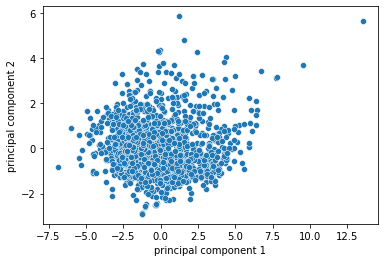

In [35]:
sns.scatterplot(principaldf['principal component 1'], principaldf['principal component 2'])